# Tracer simulation results

* A notebook shows my NEMO run, frequently changing.

#Content
1. [**Boundary + Initial + Source**](#Boundary-+-Initial-+-Source)

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

In [17]:
def plot_Ba(nav_lon, nav_lat, Ba_masked, lev, ax):
    proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    # Ba
    CS=proj.contourf(x, y, Ba_masked, lev, cmap=plt.cm.gist_ncar_r, extend='both')
    proj.contour(x, y, Ba_masked, lev, linewidths=1.5, colors=('gray',))
    # Frame
    proj.plot(x.T, y.T, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    proj.plot(x, y, color='k', linestyle='-', linewidth=0.01, alpha=0.25)
    return CS

In [4]:
boundary_name=glob.glob('_data/Exchange/Ba_boundary.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
domain=Boundary_Mat['domain']

```fortran
tra(:, :, 1, jpmyt1) = ((Ba(:, :)-trn(:, :, 1, jpmyt1))*rnf(:, :)+(0-trn(:, :, 1, jpmyt1))*ice2o(:, :))/e3t(:, :, 1)/1000.0
```

In [11]:
ptrc_obj = nc.Dataset('_data\\ALL01_1m_00010101_00041001_ptrc_T.nc')
ptrc_obj2 = nc.Dataset('_data\\RF01_1m_00010101_00041001_ptrc_T.nc')
#ptrc_obj3 = nc.Dataset('_data\\ICE01_1m_00010101_00041001_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]*1e-6
Ba2=ptrc_obj2.variables['Ba'][:]*1e-6
#Ba3=ptrc_obj3.variables['Ba'][:]*1e-6
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
Ba_masked = np.ma.masked_where(((domain==0) | (Ba[44, 0, :, :]==0)), Ba[44, 0, :, :])
Ba2_masked = np.ma.masked_where(((domain==0) | (Ba2[44, 0, :, :]==0)), Ba2[44, 0, :, :])
#Ba3_masked = np.ma.masked_where(((domain==0) | (Ba3[44, 0, :, :]==0)), Ba3[44, 0, :, :])

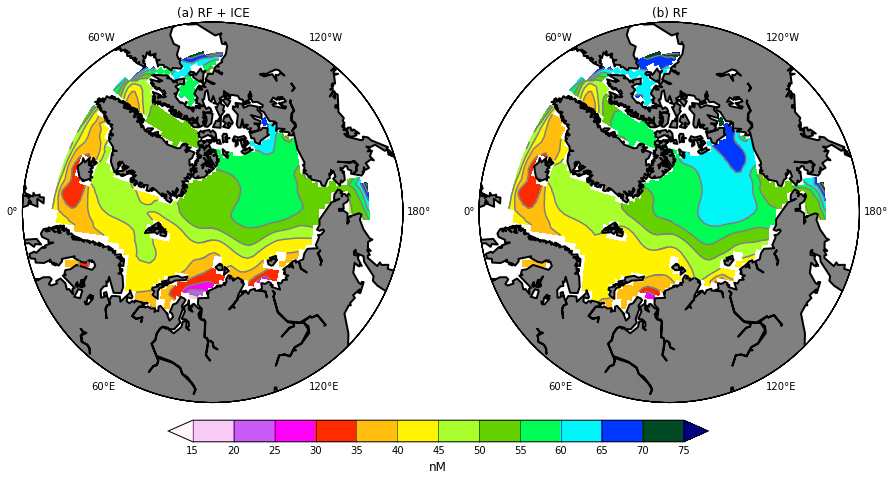

In [26]:
lev = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
plot_Ba(nav_lon, nav_lat, Ba_masked, lev, ax1)
CS = plot_Ba(nav_lon, nav_lat, Ba2_masked, lev, ax2)
# Title
ax1.set_title('(a) RF + ICE'); ax2.set_title('(b) RF')
# Legend
cax  = fig.add_axes([0.26, 0.3, 0.5, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev)

In [27]:
BC = Ba[:, 0, 122, 55]
BC2 = Ba2[:, 0, 122, 55]

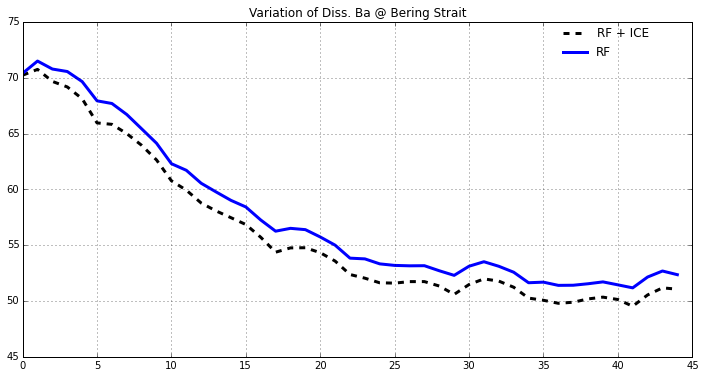

In [31]:
fig = plt.figure(figsize=(12, 6))
ax = fig.gca();ax.grid()
ax.plot(BC, 'k--', lw=3, label='RF + ICE')
ax.plot(BC2, 'b-', lw=3, label='RF')
LG = ax.legend(numpoints=1, bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.); LG.draw_frame(False)
ax.set_title('Variation of Diss. Ba @ Bering Strait')